In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Exploratory Data Analysis

In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
#Number of observations in each label spam and ham
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [8]:
df.groupby('target').describe().T

target                          ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

target                                                    spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Jakkula vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


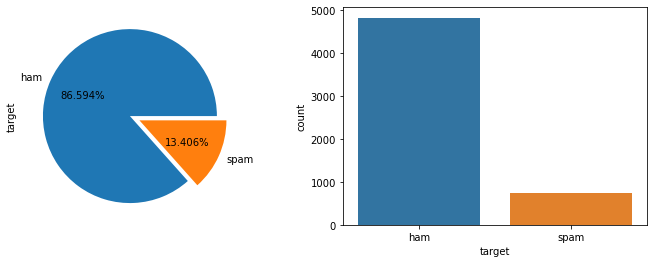

In [10]:
f,ax=plt.subplots(1,2, figsize=(12,4))
df.target.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('target',data=df)
plt.show()

In [11]:
# check for duplicate values and remove freq rows
#df.duplicated().sum()

In [12]:
# remove duplicates
#df = df.drop_duplicates(keep='first')

In [13]:
#df.duplicated().sum()

In [14]:
#df.shape

In [15]:
#df['target'].value_counts()

In [16]:
#Encode target labels with value between 0 and 1.
#This transformer should be used to encode target values, spam and ham, 
# LabelEncoder()--->converts ham=0, spam=1.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# get independent festures to X
X = df.drop('target',axis=1)
X.head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
y = df['target']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32

In [21]:
print('shape of X is', X.shape)
print('shape of y is', y.shape)

shape of X is (5572, 1)
shape of y is (5572,)


# Text Preprocessing Using NLP techniques

In [22]:
messages=X.copy()
messages

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [23]:
# here we are taking text for analysing 
messages['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [24]:
messages.reset_index(inplace=True)

# Using regular expression(re) to replace email address, urls, phone number, money


In [25]:
# NLP 
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jakkula
[nltk_data]     vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Word Form Normalization
Forms can have many inclinations, but more often they are not important and 
we need to know only the base form of the word.
###  That can be done by
##    Stemming: keeping only the root of the word (usually just deleting suffixes)
####  Examples:--> economy, economic, economical, economically, economics, economize => econom
##   Lemmatization: keeping only the lemma
####   Examples:--> produce, produces, product, production => produce
   

In [27]:
# here we use only stemming method
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
corpus = []
for i in range(0, len(messages)):
    
    # re.sub('[^a-zA-Z]')---> remove text in square brackets,remove links,remove punctuation
    # and remove words containing numbers
    
    # .lower()---> make text lowercase
    
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i]) #removes all special characters other than a-z,A-Z
    review = review.lower()
    
    #word_tokenization method
    review = review.split()   # sentences to words to apply stopwords
    
    #Stopwords are commonly used words in English which have no contextual meaning in an sentence. 
    #So therefore we remove them before classification.
    
    # stemming is applied for words that which words are not in stop words
    # remove stop words from SMS
    # remove word stems using Porter stemmer
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    
    # then again joined into sentences
    review = ' '.join(review)
    corpus.append(review)    # appended to new list corpus

In [29]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [30]:
# compare sentences before and after text preprocessing
for i in range(0,10):
    print(messages['text'][i])
    print(corpus[i])
    print("------------------------------------------------------------------")

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
------------------------------------------------------------------
Ok lar... Joking wif u oni...
ok lar joke wif u oni
------------------------------------------------------------------
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
------------------------------------------------------------------
U dun say so early hor... U c already then say...
u dun say earli hor u c alreadi say
------------------------------------------------------------------
Nah I don't think he goes to usf, he lives around here though
nah think goe usf live around though
--------------------------------------------------

### creating a bag-of-words

In [31]:
from nltk.tokenize import word_tokenize

In [32]:
all_words = []
for sms in corpus:
    words1 = word_tokenize(sms)
    for w in words1:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [33]:
print('Number of words: {}'.format(len(all_words)))

Number of words: 6237


In [34]:
# print 10 most common words
print('10 most common words: {} \n'.format(all_words.most_common(10)))

10 most common words: [('u', 1212), ('call', 693), ('go', 459), ('get', 458), ('ur', 385), ('gt', 318), ('lt', 316), ('come', 302), ('ok', 292), ('day', 291)] 



# Word2Vector converting
# Using TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(corpus)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6211,6212,6213,6214,6215,6216,6217,6218,6219,6220
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building using Deep Learning Models

In [40]:
corpus[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [41]:
# now convert to one hot code representation

### Vocabulary size
voc_size=5000

In [51]:
#importing libraries

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout,Flatten

In [43]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0:5]

[[3316,
  3716,
  2890,
  1945,
  4786,
  4033,
  4871,
  493,
  156,
  4620,
  3844,
  1252,
  871,
  72,
  341,
  3843],
 [1332, 1720, 1021, 4109, 3836, 2042],
 [3221,
  4171,
  2058,
  3977,
  522,
  877,
  4865,
  2191,
  438,
  685,
  2106,
  2289,
  877,
  560,
  4171,
  1278,
  28,
  3997,
  4930,
  705,
  4707],
 [3836, 2377, 1417, 2748, 1024, 3836, 705, 3579, 1417],
 [2724, 1991, 2025, 580, 3005, 320, 1733]]

In [44]:
print(corpus[0:5])
print(onehot_repr[0:5])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though']
[[3316, 3716, 2890, 1945, 4786, 4033, 4871, 493, 156, 4620, 3844, 1252, 871, 72, 341, 3843], [1332, 1720, 1021, 4109, 3836, 2042], [3221, 4171, 2058, 3977, 522, 877, 4865, 2191, 438, 685, 2106, 2289, 877, 560, 4171, 1278, 28, 3997, 4930, 705, 4707], [3836, 2377, 1417, 2748, 1024, 3836, 705, 3579, 1417], [2724, 1991, 2025, 580, 3005, 320, 1733]]


In [45]:
# we can observe that length of every sentence are different
# to convert into embedding vector the sentences length should be same


len(max(onehot_repr,key=len))

77

# Embedding Representation

In [46]:
# here we use Padding Sequences
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   72  341 3843]
 [   0    0    0 ... 4109 3836 2042]
 [   0    0    0 ... 4930  705 4707]
 ...
 [   0    0    0 ... 3799 4824 1180]
 [   0    0    0 ...  728 1158 3221]
 [   0    0    0 ... 3093 1834 4080]]


In [49]:

print(corpus[0])
print(onehot_repr[0])
print(embedded_docs[0])

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
[3316, 3716, 2890, 1945, 4786, 4033, 4871, 493, 156, 4620, 3844, 1252, 871, 72, 341, 3843]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 3316 3716 2890 1945
 4786 4033 4871  493  156 4620 3844 1252  871   72  341 3843]


# 1) Recurrent Neural Network model

# LSTM

In [80]:
model_LSTM=Sequential()
model_LSTM.add(Embedding(5000, 10, input_length=40))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dropout(0.10))
model_LSTM.add(Dense(1,activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 10)            50000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 94,501
Trainable params: 94,501
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
model_LSTM

In [54]:
len(embedded_docs),y.shape

(5572, (5572,))

In [55]:
# convert independent and dependent features into array
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [56]:
X_final.shape,y_final.shape

print('X_final.shape-->',X_final.shape)
print('y_final.shape-->',y_final.shape)

X_final.shape--> (5572, 40)
y_final.shape--> (5572,)


In [57]:
X_final[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3316, 3716, 2890, 1945, 4786, 4033, 4871,  493,  156,
       4620, 3844, 1252,  871,   72,  341, 3843])

In [58]:
embedded_docs[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3316, 3716, 2890, 1945, 4786, 4033, 4871,  493,  156,
        4620, 3844, 1252,  871,   72,  341, 3843],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1332, 1720, 1021, 4109, 3836, 2042],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 3221, 4171, 2058,
        3977,  522,  877, 4865, 2191,  438,  685, 2106, 2289,  877,  560,
        4171, 1278,   28, 3997, 4930,  705, 4707]])

In [59]:
X_final[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3316, 3716, 2890, 1945, 4786, 4033, 4871,  493,  156,
        4620, 3844, 1252,  871,   72,  341, 3843],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1332, 1720, 1021, 4109, 3836, 2042],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 3221, 4171, 2058,
        3977,  522,  877, 4865, 2191,  438,  685, 2106, 2289,  877,  560,
        4171, 1278,   28, 3997, 4930,  705, 4707]])

In [60]:
# Note: here in (5169, 40), 40 is came after we done embedding with sent_size = 40

In [61]:
# spliting train, test  data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [82]:
### Finally Training
model_LSTM_history = model_LSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
59/59 [==============================] - 7s 59ms/step - loss: 0.4222 - accuracy: 0.8610 - val_loss: 0.3112 - val_accuracy: 0.8630
Epoch 2/15
59/59 [==============================] - 3s 50ms/step - loss: 0.1939 - accuracy: 0.9269 - val_loss: 0.1203 - val_accuracy: 0.9826
Epoch 3/15
59/59 [==============================] - 3s 50ms/step - loss: 0.0686 - accuracy: 0.9821 - val_loss: 0.0624 - val_accuracy: 0.9837
Epoch 4/15
59/59 [==============================] - 3s 50ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.0544 - val_accuracy: 0.9848
Epoch 5/15
59/59 [==============================] - 3s 50ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 6/15
59/59 [==============================] - 3s 50ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0523 - val_accuracy: 0.9842
Epoch 7/15
59/59 [==============================] - 3s 50ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.0633 - val_accuracy: 0.9842
Epoch 8/15
59

In [63]:
model_LSTM_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

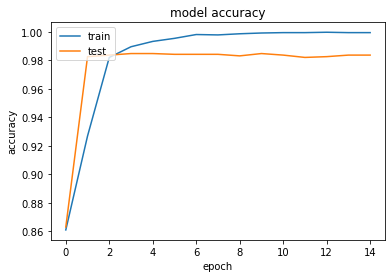

In [83]:
# summarize history for accuracy
plt.plot(model_LSTM_history.history['accuracy'])
plt.plot(model_LSTM_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

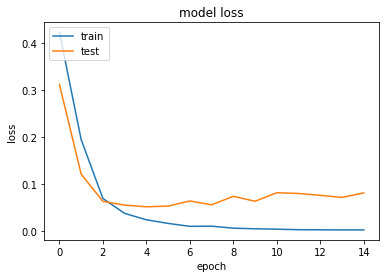

In [84]:
# summarize history for loss
plt.plot(model_LSTM_history.history['loss'])
plt.plot(model_LSTM_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
y_pred = model_LSTM.predict(X_test)
y_pred = np.round(y_pred).astype(int)

58/58 [==============================] - 1s 7ms/step


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1581,    6],
       [  24,  228]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9836867862969005

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1587
           1       0.97      0.90      0.94       252

    accuracy                           0.98      1839
   macro avg       0.98      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



# GRU

In [74]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout

In [76]:
model_GRU=Sequential()
model_GRU.add(Embedding(5000, 10, input_length=40))
model_GRU.add(GRU(100))
model_GRU.add(Dropout(0.10))
model_GRU.add(Dense(1,activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_GRU.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 10)            50000     
                                                                 
 gru_1 (GRU)                 (None, 100)               33600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 83,701
Trainable params: 83,701
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
model_GRU_history = model_GRU.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
59/59 [==============================] - 6s 52ms/step - loss: 0.4031 - accuracy: 0.8612 - val_loss: 0.2616 - val_accuracy: 0.8630
Epoch 2/15
59/59 [==============================] - 3s 45ms/step - loss: 0.1220 - accuracy: 0.9512 - val_loss: 0.0733 - val_accuracy: 0.9837
Epoch 3/15
59/59 [==============================] - 3s 45ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0561 - val_accuracy: 0.9869
Epoch 4/15
59/59 [==============================] - 3s 44ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0552 - val_accuracy: 0.9869
Epoch 5/15
59/59 [==============================] - 3s 43ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0536 - val_accuracy: 0.9864
Epoch 6/15
59/59 [==============================] - 2s 39ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0573 - val_accuracy: 0.9859
Epoch 7/15
59/59 [==============================] - 2s 39ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0558 - val_accuracy: 0.9848
Epoch 8/15
59

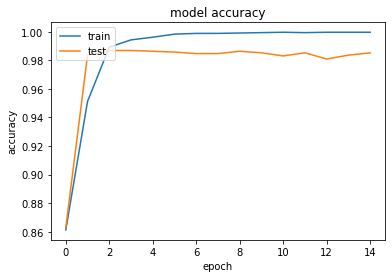

In [78]:
# summarize history for accuracy
plt.plot(model_GRU_history.history['accuracy'])
plt.plot(model_GRU_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

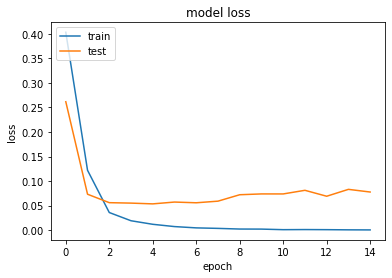

In [79]:
# summarize history for loss
plt.plot(model_GRU_history.history['loss'])
plt.plot(model_GRU_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Performance Metrics And Accuracy

In [85]:
y_pred = model_GRU.predict(X_test)
y_pred = np.round(y_pred).astype(int)

58/58 [==============================] - 1s 6ms/step


In [86]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       4644,  710, 2298,  381, 3551, 2202, 3647, 2944, 4851, 3887, 2546,
        381, 1535, 2645, 2324, 1684,  390, 3464])

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1582,    5],
       [  22,  230]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9853181076672104

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1587
           1       0.98      0.91      0.94       252

    accuracy                           0.99      1839
   macro avg       0.98      0.95      0.97      1839
weighted avg       0.99      0.99      0.99      1839



# Testing our Model with Examples

In [64]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import one_hot

ps = PorterStemmer()

def transform_text(messages):
    review = re.sub('[^a-zA-Z]', ' ', messages)  # removes all special characters other than a-z,A-Z
    review = review.lower()  # all characters sat to lowercase

    # word_tokenization method
    review = review.split()  # sentences to words to apply stopwords

    # stemming is applied for words that which words are not in stop words
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

    # then again joined into sentences
    review = ' '.join(review)

    # onehot representing
    voc_size = 5000
    one_hot_ex = [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 0, 0,  0, 0]
    onehot_repr = one_hot(review, voc_size)
    
    list = []
    list.append(one_hot_ex)
    list.append(onehot_repr)
    
    sent_length=40
    embedded_docs=pad_sequences(list,padding='pre',maxlen=sent_length)
    
    return embedded_docs

message = transform_text(input("Enter Here : \n"))

result = model.predict(message)[1]
result = np.round(result).astype(int)

if result == 1:
    print("Spam")
else:
    print(" Not Spam")

Enter Here : 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1/1 [==============================] - 0s 34ms/step
Spam


# saving model to file

In [65]:
filename = "sms_spam_model.h5"
model.save(filename)

In [66]:
#test model

from tensorflow.keras.models import load_model

In [67]:
loaded_model = load_model(filename)

In [68]:
loaded_model.predict(X_test[0:1])

1/1 [==============================] - 1s 602ms/step


array([[0.02393938]], dtype=float32)